##Arbol de desición

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/Enfermedad.csv', index_col = 0) #indicar index, 0 se refiere a primera columna
data.head()

,ENFERMEDAD,AZUCARELEV,FUMA,LICOR,SOBREPESO,HIPERTENSO,EDAD
EXPEDIENTE,,,,,,,
0,SI,1,1,0,1,1,39
1,SI,1,0,0,0,0,36
2,SI,1,1,1,1,1,42
3,SI,1,1,1,1,1,37
4,SI,1,1,1,1,1,36


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1106 entries, 0 to 1105
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ENFERMEDAD  1106 non-null   object
 1   AZUCARELEV  1106 non-null   int64 
 2   FUMA        1106 non-null   int64 
 3   LICOR       1106 non-null   int64 
 4   SOBREPESO   1106 non-null   int64 
 5   HIPERTENSO  1106 non-null   int64 
 6   EDAD        1106 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 69.1+ KB


In [ ]:
X = data.iloc[:,1:7]
Y = data.iloc[:,0]

In [ ]:
X.head()

,AZUCARELEV,FUMA,LICOR,SOBREPESO,HIPERTENSO,EDAD
EXPEDIENTE,,,,,,
0,1,1,0,1,1,39
1,1,0,0,0,0,36
2,1,1,1,1,1,42
3,1,1,1,1,1,37
4,1,1,1,1,1,36


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.75, random_state = 0) 
#random_state se usa para el reparto pseudoaleatorio sea el mismo todos los números

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 829 entries, 717 to 684
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   AZUCARELEV  829 non-null    int64
 1   FUMA        829 non-null    int64
 2   LICOR       829 non-null    int64
 3   SOBREPESO   829 non-null    int64
 4   HIPERTENSO  829 non-null    int64
 5   EDAD        829 non-null    int64
dtypes: int64(6)
memory usage: 45.3 KB


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
arbol = DecisionTreeClassifier(max_depth = 4)

In [ ]:
arbol_data = arbol.fit(X_train, Y_train)

In [ ]:
from matplotlib import pyplot as plt
from sklearn import tree

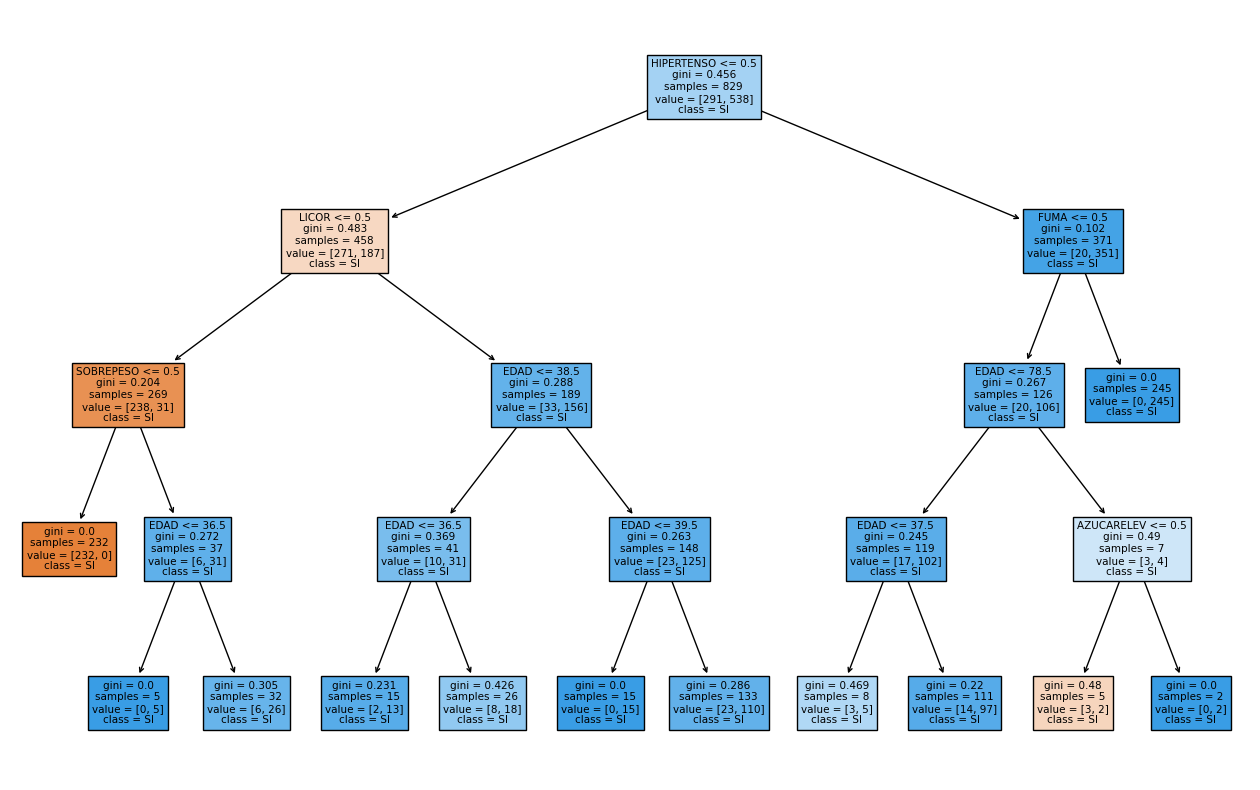

In [ ]:
fig = plt.figure(figsize = (16,10))
tree.plot_tree(arbol_data, feature_names = list(X.columns.values), class_names = list(Y.values), filled = True)
plt.show()

In [ ]:
#Componentes del cuadro
#1. pregunta
#2. gini = mide la pureza del nodo, entre mas pequeño seas, mas puro es y tendremos una mejor division de las clases
#3. Cantidad de individuos que cumplen con todas las condiciones
#4. Cantidad de individuos por clase[NO, SI]
#5. Clase del nodo, acorde a la mayoria de los individuos, osea si el nodo dice SI tiene mas individios por clase en la zona del SI

#Un gini de 0.0 indica que hay un individuo con la enfermedad que se cree que tiene

In [ ]:
Y_pred = arbol_data.predict(X_test)
Y_pred

array(['SI', 'SI', 'NO', 'SI', 'SI', 'NO', 'SI', 'NO', 'SI', 'SI', 'SI',
       'SI', 'NO', 'NO', 'SI', 'SI', 'SI', 'SI', 'SI', 'SI', 'SI', 'NO',
       'NO', 'NO', 'SI', 'SI', 'NO', 'SI', 'SI', 'NO', 'SI', 'NO', 'SI',
       'NO', 'SI', 'SI', 'SI', 'SI', 'SI', 'SI', 'SI', 'NO', 'NO', 'SI',
       'NO', 'SI', 'NO', 'NO', 'SI', 'SI', 'SI', 'SI', 'SI', 'SI', 'SI',
       'SI', 'SI', 'SI', 'NO', 'SI', 'SI', 'SI', 'SI', 'NO', 'SI', 'SI',
       'SI', 'SI', 'SI', 'SI', 'SI', 'SI', 'SI', 'NO', 'SI', 'SI', 'NO',
       'SI', 'NO', 'SI', 'SI', 'SI', 'NO', 'NO', 'SI', 'NO', 'SI', 'SI',
       'SI', 'NO', 'SI', 'SI', 'SI', 'SI', 'SI', 'NO', 'NO', 'SI', 'NO',
       'SI', 'SI', 'SI', 'NO', 'SI', 'NO', 'SI', 'SI', 'NO', 'SI', 'SI',
       'NO', 'SI', 'NO', 'SI', 'SI', 'SI', 'NO', 'SI', 'SI', 'SI', 'SI',
       'SI', 'SI', 'SI', 'SI', 'NO', 'SI', 'NO', 'SI', 'SI', 'SI', 'SI',
       'SI', 'NO', 'SI', 'NO', 'NO', 'NO', 'SI', 'NO', 'SI', 'SI', 'SI',
       'NO', 'SI', 'SI', 'SI', 'SI', 'SI', 'NO', 'S

In [ ]:
from sklearn.metrics import confusion_matrix

matriz_de_confusion = confusion_matrix(Y_test, Y_pred)
matriz_de_confusion

#la suma de la fila 1, indica el numero real de individuos en clase no
#La suma de la fila 2, indica el numero real de individuos con clase si
#La suma de la columna 1, indica el numero predicho de individuos con clase no
#La suma de la columna 2, indica el numero predicho de individuos en clase si
#la diagonal izq-der de la matriz, indica la cantidad de individuos cuyo valor fue correctamente predicho
#la diagonal der-izq de la matriz, indica la cantidad de individuos cuyo valor fue erroneamente predicho

array([[ 79,  22],
       [  1, 175]])

In [ ]:
import numpy as np
presicion_global = np.sum(matriz_de_confusion.diagonal())/np.sum(matriz_de_confusion)
presicion_global

0.9169675090252708

In [ ]:
presicion_no = ((matriz_de_confusion[0, 0]))/sum(matriz_de_confusion[0,])
presicion_no

0.7821782178217822

In [ ]:
presicion_si = ((matriz_de_confusion[0,1]))/sum(matriz_de_confusion[1,])
presicion_si

0.125